# Visualización de los datos de polen
En este cuaderno se visualizan y analizan los datos preprocesados. Sirve para ver las características de los mismos y posiblemente mejorar el preprocesado.

In [110]:
import pandas as pd

In [111]:
input_file = '../1 Preprocesado/polen/gramineas.csv'

In [112]:
# Cargamos el dataset
df = pd.read_csv(input_file)
df["fecha"] = pd.to_datetime(df["fecha"], format='%Y-%m-%d')

In [113]:
# Número de filas
print("Número de filas:", len(df))

Número de filas: 3762


Mínimo y máximo histórico

In [114]:
# Máximo y mínimo de granos_de_polen con fecha
max_granos_de_polen = df["granos_de_polen"].max()
min_granos_de_polen = df["granos_de_polen"].min()


print(f"Máximo de granos_de_polen: {max_granos_de_polen}")
print(f"Fechas con el máximo de granos_de_polen: {df[df['granos_de_polen'] == max_granos_de_polen]['fecha'].tolist()}")
print(f"Mínimo de granos_de_polen: {min_granos_de_polen}")

Máximo de granos_de_polen: 465
Fechas con el máximo de granos_de_polen: [Timestamp('2014-05-06 00:00:00')]
Mínimo de granos_de_polen: 0


## Gráficas

In [115]:
import matplotlib.pyplot as plt

Gráfico global. Se observa gran estacionalidad (como era de esperar)

In [116]:
df["fecha"].dt.year[::365]

0       2010
365     2011
730     2012
1095    2013
1460    2014
1825    2016
2190    2018
2555    2019
2920    2020
3285    2021
3650    2022
Name: fecha, dtype: int32

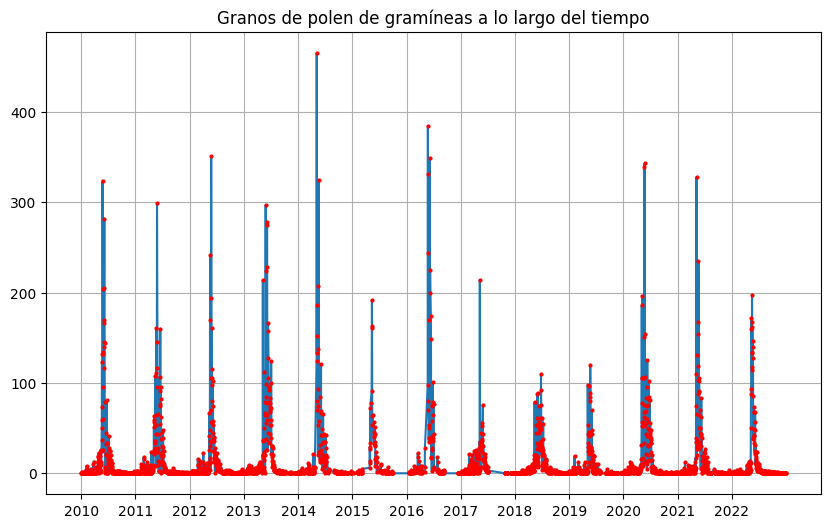

In [117]:
# Gráfico de granos_de_polen
plt.figure(figsize=(10, 6))
# Índices del primer día de cada año en el dataset
df_year = df["fecha"].dt.year
# Show first appearance of each year
df_year = df_year.drop_duplicates()
# Pass to datetime
df_year = pd.to_datetime(df_year, format='%Y')

plt.xticks(df_year, df_year.dt.year)
plt.plot(df["fecha"], df["granos_de_polen"])
plt.plot(df["fecha"], df["granos_de_polen"], color='red', marker='o', linestyle='', markersize=2)
plt.title("Granos de polen de gramíneas a lo largo del tiempo")
plt.grid() # Añadir una rejilla
# Vertical line
#plt.axvline(x=pd.to_datetime('2020-03-14'), color='r', linestyle='--')
plt.show()


Gráfico del año 2022

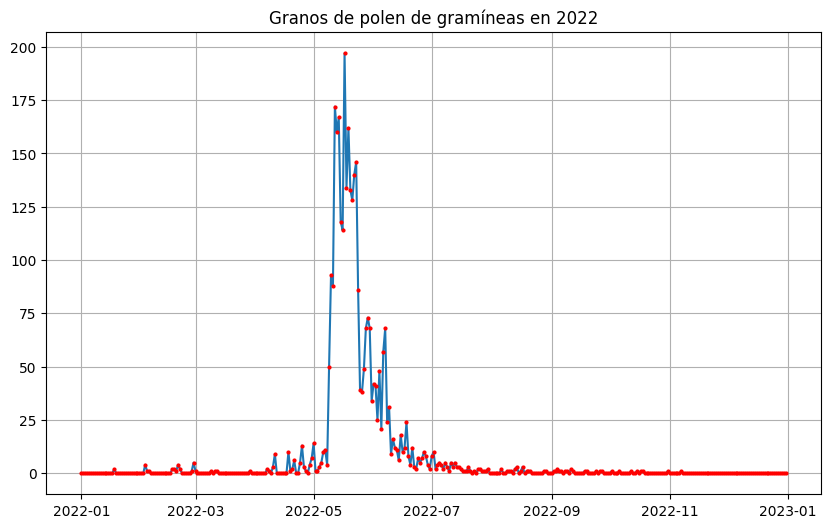

In [118]:
# Gráfico de granos de polen para el año 2022
df_2022 = df[df["fecha"].dt.year == 2022]

plt.figure(figsize=(10, 6))
plt.plot(df_2022["fecha"], df_2022["granos_de_polen"])
plt.plot(df_2022["fecha"], df_2022["granos_de_polen"], color='red', marker='o', linestyle='', markersize=2)
plt.title("Granos de polen de gramíneas en 2022")
plt.grid()
plt.show()

Meses de mayo y junio (los principales de gramíneas)

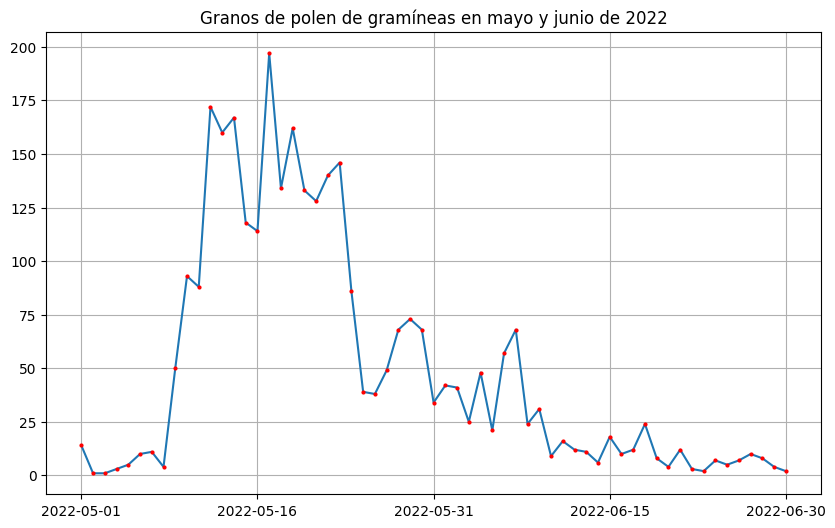

In [119]:
# Gráfico de granos de polen para los meses de mayo y junio del año 2022
df_2022_may_jun = df_2022[(df_2022["fecha"].dt.month == 5) | (df_2022["fecha"].dt.month == 6)]

plt.figure(figsize=(10, 6))
# Añadir dos ticks
plt.xticks(ticks=df_2022_may_jun["fecha"][::15], labels=df_2022_may_jun["fecha"].dt.strftime('%Y-%m-%d')[::15])
plt.plot(df_2022_may_jun["fecha"], df_2022_may_jun["granos_de_polen"])
plt.plot(df_2022_may_jun["fecha"], df_2022_may_jun["granos_de_polen"], color='red', marker='o', linestyle='', markersize=2)
plt.title("Granos de polen de gramíneas en mayo y junio de 2022")
plt.grid()
plt.show()

C:\Users\Jaime\AppData\Local\Temp\ipykernel_14592\2990844955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_may_jun["fecha"] = df_2021_may_jun["fecha"] + pd.DateOffset(years=1)


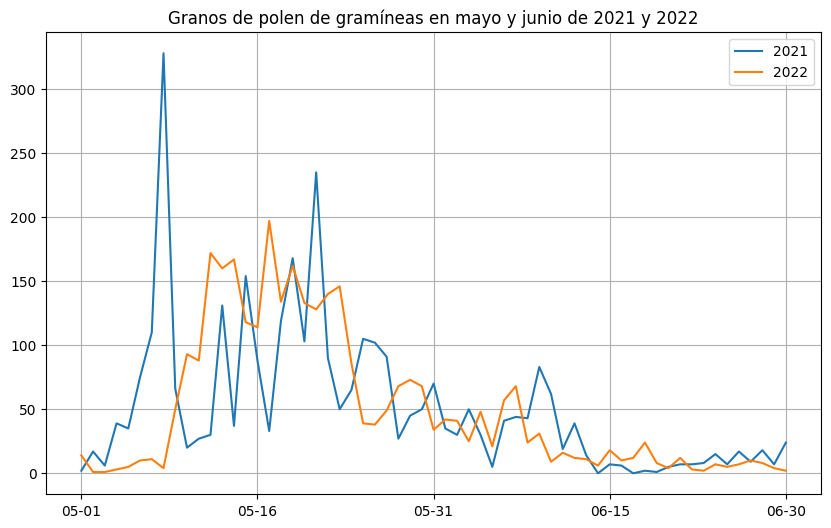

In [120]:
# Superposición de gráfico de granos de polen para los meses de mayo y junio de los años 2021 y 2022
df_2021 = df[df["fecha"].dt.year == 2021]
df_2021_may_jun = df_2021[(df_2021["fecha"].dt.month == 5) | (df_2021["fecha"].dt.month == 6)]

# Poner 2021 sobre 2022
df_2021_may_jun["fecha"] = df_2021_may_jun["fecha"] + pd.DateOffset(years=1)

plt.figure(figsize=(10, 6))
plt.xticks(ticks=df_2022_may_jun["fecha"][::15], labels=df_2022_may_jun["fecha"].dt.strftime('%m-%d')[::15])
plt.plot(df_2021_may_jun["fecha"], df_2021_may_jun["granos_de_polen"], label="2021")
plt.plot(df_2022_may_jun["fecha"], df_2022_may_jun["granos_de_polen"], label="2022")
plt.title("Granos de polen de gramíneas en mayo y junio de 2021 y 2022")
plt.grid()
plt.legend()
plt.show()

Evolución de máximos. Se observa inestabilidad en los máximos.

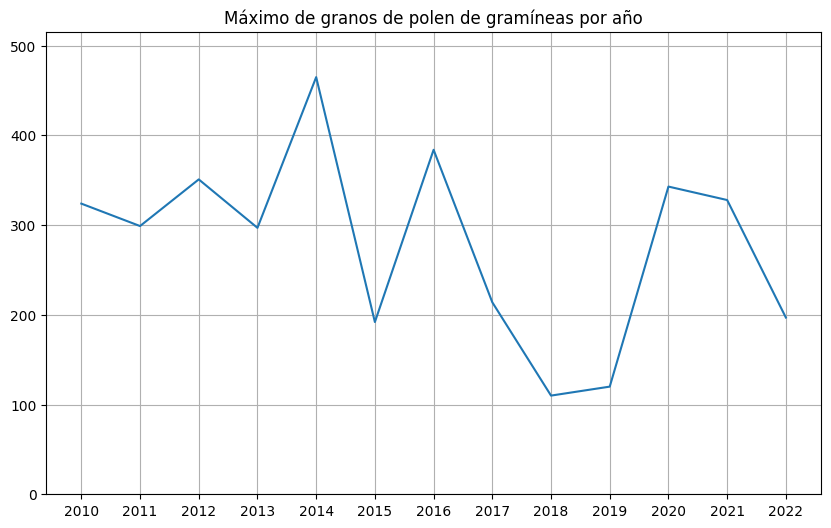

In [121]:
# Máximo de granos de polen para cada año
df["year"] = df["fecha"].dt.year
max_granos_de_polen_year = df.groupby("year")["granos_de_polen"].max()

# Gráfico de máximos
plt.figure(figsize=(10, 6))
# Mínimo en 0
plt.ylim(0, max_granos_de_polen_year.max() + 50)
plt.xticks(max_granos_de_polen_year.index)
plt.plot(max_granos_de_polen_year)
plt.title("Máximo de granos de polen de gramíneas por año")
plt.grid() # Añadir una rejilla
plt.show()

#### Medias y medianas

Media anual (filtrando meses relevantes)

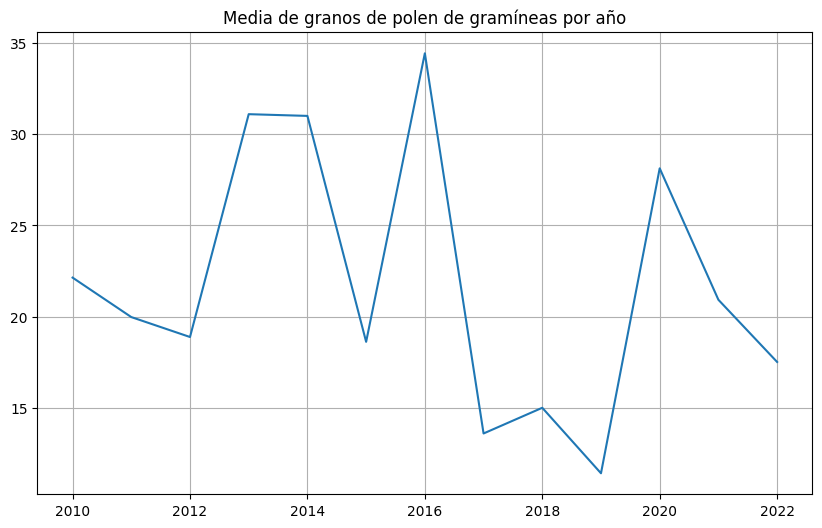

In [122]:
# Granos de polen medios por año (en primavera y verano)
df_filtered = df[(df["fecha"].dt.month >= 3) & (df["fecha"].dt.month <= 8)]
mean_granos_de_polen_year = df_filtered.groupby("year")["granos_de_polen"].mean()

# Gráfico de medias
plt.figure(figsize=(10, 6))
plt.plot(mean_granos_de_polen_year)
plt.title("Media de granos de polen de gramíneas por año")
plt.grid() # Añadir una rejilla
plt.show()

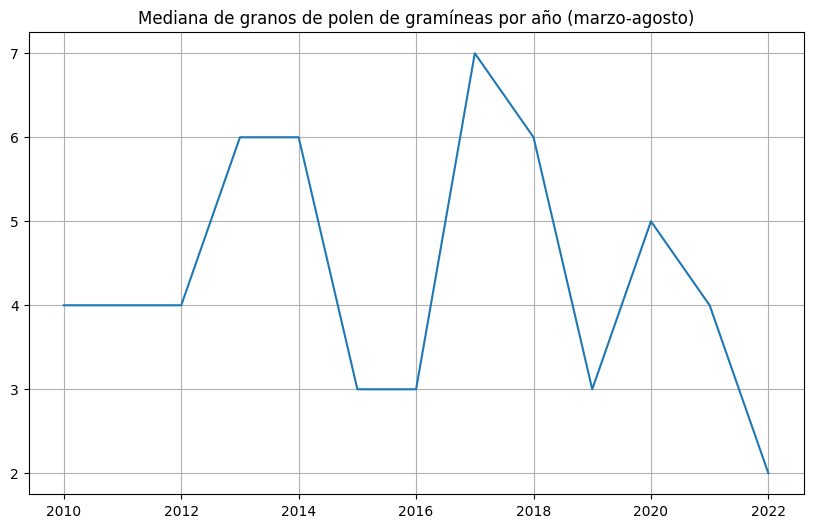

In [123]:
# Mediana de granos de polen por año eliminando los meses entre agosto y marzo
df_filtered = df[(df["fecha"].dt.month >= 3) & (df["fecha"].dt.month <= 8)]
median_granos_de_polen_year = df_filtered.groupby("year")["granos_de_polen"].median()

# Gráfico de medianas
plt.figure(figsize=(10, 6))
plt.plot(median_granos_de_polen_year)
plt.title("Mediana de granos de polen de gramíneas por año (marzo-agosto)")
plt.grid() # Añadir una rejilla
plt.show()

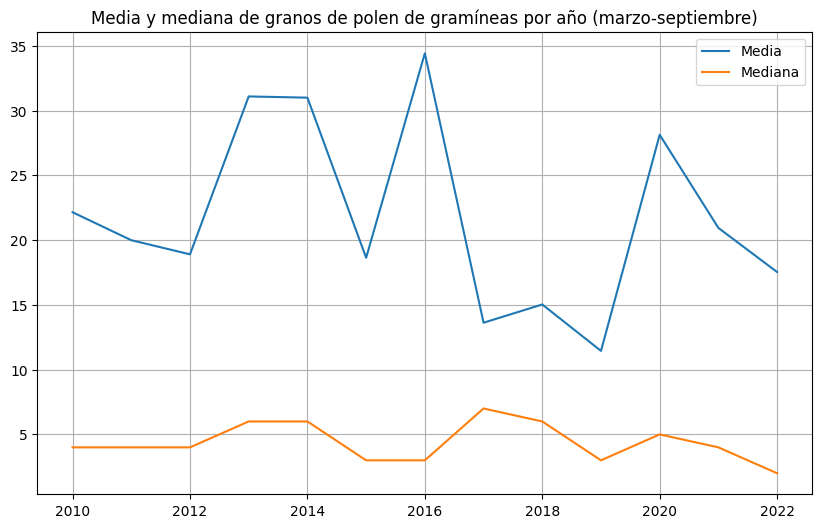

In [124]:
# Superposición de medias y medianas anuales
plt.figure(figsize=(10, 6))
plt.plot(mean_granos_de_polen_year, label="Media")
plt.plot(median_granos_de_polen_year, label="Mediana")
plt.title("Media y mediana de granos de polen de gramíneas por año (marzo-septiembre)")
plt.legend()
plt.grid() # Añadir una rejilla
plt.show()

Media por mes

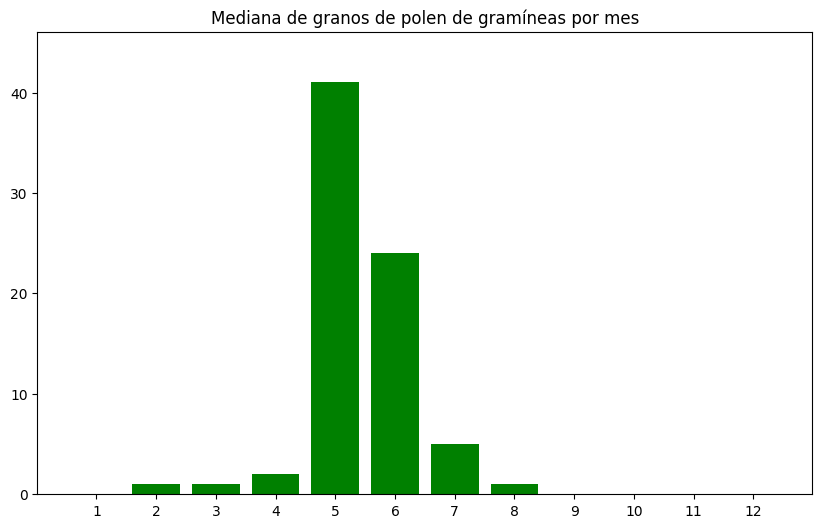

In [125]:
# Mediana de granos de polen por mes
df["month"] = df["fecha"].dt.month
median_granos_de_polen_month = df.groupby("month")["granos_de_polen"].median()

# Gráfico de barras de la mediana
plt.figure(figsize=(10, 6))
plt.ylim(0, median_granos_de_polen_month.max() + 5)
plt.xticks(median_granos_de_polen_month.index)
plt.bar(median_granos_de_polen_month.index, median_granos_de_polen_month, color='green')
plt.title("Mediana de granos de polen de gramíneas por mes")
plt.show()

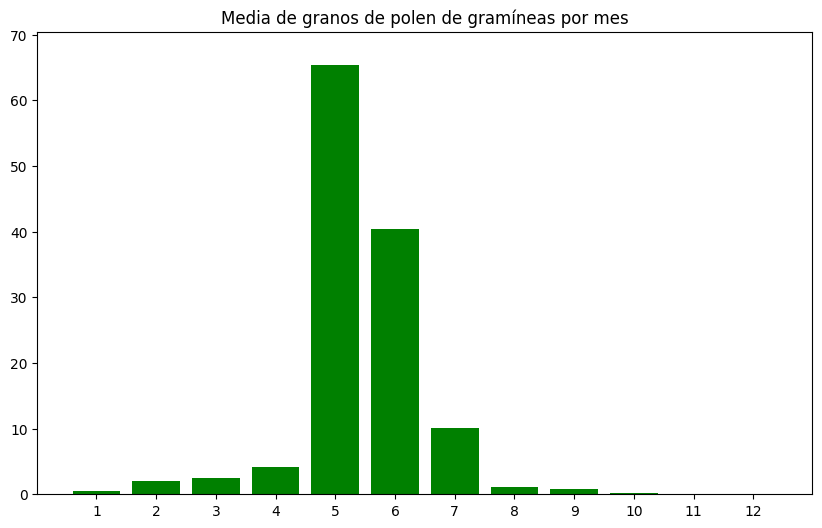

In [126]:
# Granos de polen medios por mes
df["month"] = df["fecha"].dt.month
mean_granos_de_polen_month = df.groupby("month")["granos_de_polen"].mean()

# Gráfico de medias
plt.figure(figsize=(10, 6))
plt.ylim(0, mean_granos_de_polen_month.max() + 5)
plt.xticks(mean_granos_de_polen_month.index)
plt.bar(mean_granos_de_polen_month.index, mean_granos_de_polen_month, color='green')
plt.title("Media de granos de polen de gramíneas por mes")
plt.show()

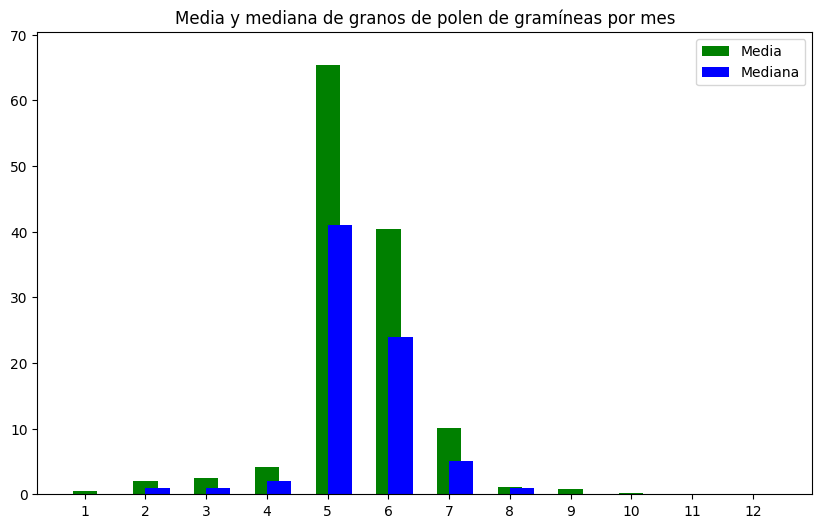

In [127]:
# Superposición de los gráficos de mediana y media
plt.figure(figsize=(10, 6))
plt.ylim(0, max(mean_granos_de_polen_month.max(), median_granos_de_polen_month.max()) + 5)
plt.xticks(mean_granos_de_polen_month.index)
plt.bar(mean_granos_de_polen_month.index, mean_granos_de_polen_month, color='green', label="Media", width=0.4, align='center')
plt.bar(median_granos_de_polen_month.index, median_granos_de_polen_month, color='blue', label="Mediana", width=0.4, align='edge')
plt.title("Media y mediana de granos de polen de gramíneas por mes")
plt.legend()
plt.show()

Media anual (usando el mes de mayo como referencia)

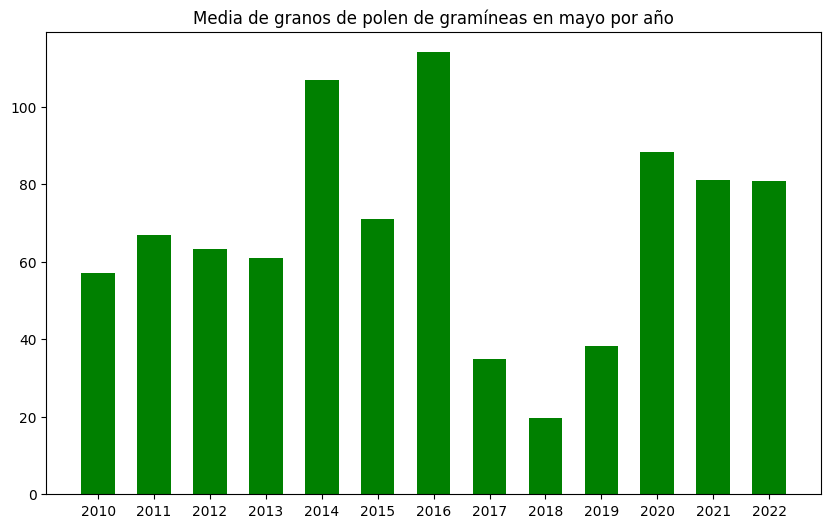

In [128]:
# Media de granos de polen por año (usando solo mayo)
df_filtered = df[df["fecha"].dt.month == 5]
mean_granos_de_polen_year = df_filtered.groupby("year")["granos_de_polen"].mean()

# Gráfico de medias
plt.figure(figsize=(10, 6))
plt.ylim(0, mean_granos_de_polen_year.max() + 5)
plt.xticks(mean_granos_de_polen_year.index)
plt.bar(mean_granos_de_polen_year.index, mean_granos_de_polen_year, color='green', width=0.6)
plt.title("Media de granos de polen de gramíneas en mayo por año")
plt.show()

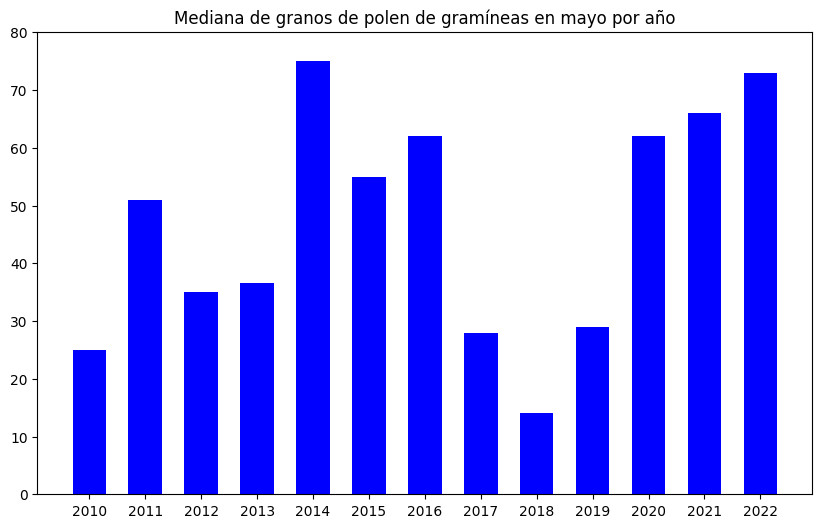

In [129]:
# Mediana de granos de polen por año (usando solo mayo)
df_filtered = df[df["fecha"].dt.month == 5]
median_granos_de_polen_year = df_filtered.groupby("year")["granos_de_polen"].median()

# Gráfico de medianas
plt.figure(figsize=(10, 6))
plt.ylim(0, median_granos_de_polen_year.max() + 5)
plt.xticks(median_granos_de_polen_year.index)
plt.bar(median_granos_de_polen_year.index, median_granos_de_polen_year, color='blue', width=0.6)
plt.title("Mediana de granos de polen de gramíneas en mayo por año")
plt.show()

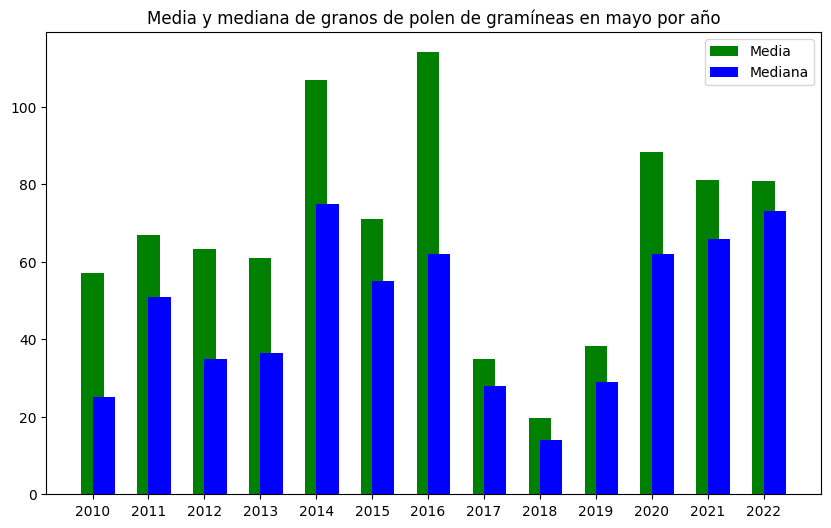

In [130]:
# Superposición de medias y medianas anuales
plt.figure(figsize=(10, 6))
plt.ylim(0, max(mean_granos_de_polen_year.max(), median_granos_de_polen_year.max()) + 5)
plt.xticks(mean_granos_de_polen_year.index)
plt.bar(mean_granos_de_polen_year.index, mean_granos_de_polen_year, color='green', label="Media", width=0.4, align='center')
plt.bar(median_granos_de_polen_year.index, median_granos_de_polen_year, color='blue', label="Mediana", width=0.4, align='edge')
plt.title("Media y mediana de granos de polen de gramíneas en mayo por año")
plt.legend()
plt.show()

Acumulación de polen total anual

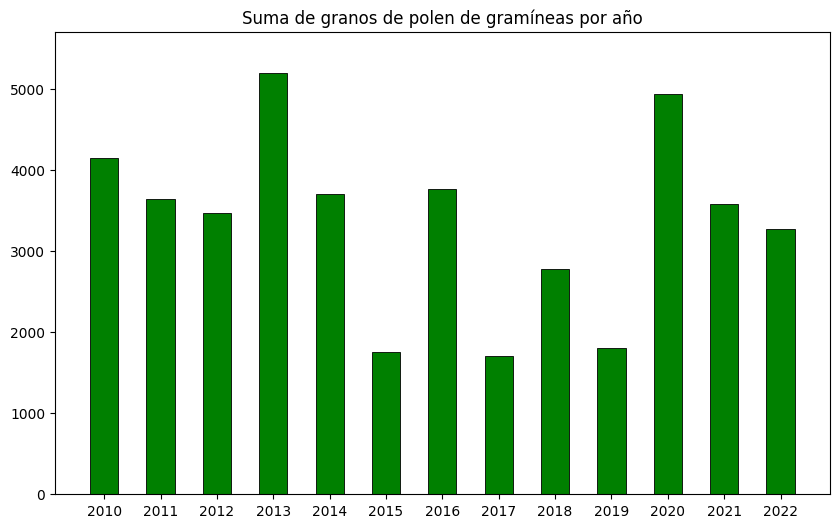

In [131]:
# Suma de granos de polen por año
sum_granos_de_polen_year = df.groupby("year")["granos_de_polen"].sum()

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.ylim(0, sum_granos_de_polen_year.max() + 500)
plt.xticks(sum_granos_de_polen_year.index)
plt.bar(sum_granos_de_polen_year.index, sum_granos_de_polen_year, color='green', edgecolor='black', linewidth=0.6, width=0.5)
plt.title("Suma de granos de polen de gramíneas por año")
plt.show()